# If you are reading this on Github...

* Links within notebooks (except for link at the end) **may not work properly**!

# Overview

#### Aim: Predicting customer expenditure using customer information ([Source of dataset (Kaggle)](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis))
#### What we going to do in this notebook:
1. Apply Linear Regression on the following splitted datasets:
- X_train_lr.csv
- Y_train_lr.csv
- X_test_lr.csv
- Y_test_lr.csv
2. Predicting all the response variables (TotalPurchase, MntGroceryProducts, MntWines, MntGoldProds) using Linear Regression
3. Find out which of the following variables are the best / worst predictors:
- Categorical:
    - Education
    - Marital_Status
    - HaveChild
    - YearRange
- Numerical:
    - Income
    - TotalChild
    - NumWebVisitsMonth

# Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

# Importing Data 

In [10]:
newCustomerData = pd.read_csv('dataset/customerData_Clean.csv')
newCustomerData

,Unnamed: 0,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,YearRange,TotalChild,HaveChild
0,0,1957,Graduation,Single,58138.0,0,0,58,635,88,...,3,8,10,4,7,806,25,1950,0,0
1,1,1954,Graduation,Single,46344.0,1,1,38,11,1,...,2,1,1,2,5,9,6,1950,2,1
2,2,1965,Graduation,Married,71613.0,0,0,26,426,49,...,1,8,2,10,4,287,21,1960,0,0
3,3,1984,Graduation,Married,26646.0,1,0,26,11,4,...,2,2,0,4,6,34,8,1980,1,1
4,4,1981,PhD,Married,58293.0,1,0,94,173,43,...,5,5,3,6,5,207,19,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,2161,1967,Graduation,Married,61223.0,0,1,46,709,43,...,2,9,3,4,5,267,18,1960,1,1
2162,2162,1946,PhD,Married,64014.0,2,1,56,406,0,...,7,8,2,5,7,30,22,1940,3,1
2163,2163,1981,Graduation,Divorced,56981.0,0,0,91,908,48,...,1,2,3,13,6,297,19,1980,0,0
2164,2164,1956,Master,Married,69245.0,0,1,8,428,30,...,2,6,5,10,3,324,23,1950,1,1


In [14]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2166 non-null   int64  
 1   Year_Birth           2166 non-null   int64  
 2   Education            2166 non-null   object 
 3   Marital_Status       2166 non-null   object 
 4   Income               2166 non-null   float64
 5   Kidhome              2166 non-null   int64  
 6   Teenhome             2166 non-null   int64  
 7   Recency              2166 non-null   int64  
 8   MntWines             2166 non-null   int64  
 9   MntFruits            2166 non-null   int64  
 10  MntMeatProducts      2166 non-null   int64  
 11  MntFishProducts      2166 non-null   int64  
 12  MntSweetProducts     2166 non-null   int64  
 13  MntGoldProds         2166 non-null   int64  
 14  NumDealsPurchases    2166 non-null   int64  
 15  NumWebPurchases      2166 non-null   i

In [15]:
newCustomerData.describe()

,Unnamed: 0,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,YearRange,TotalChild,HaveChild
count,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,...,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000
mean,1082.500000,1968.880425,51485.832410,0.446907,0.510157,49.157433,304.746076,26.234995,162.832410,37.174515,...,2.316251,4.077101,2.613112,5.831948,5.320406,226.241921,14.838412,1964.321330,0.957064,0.721145
std,625.414662,11.686277,20127.393997,0.538321,0.543395,28.890662,336.685171,39.551197,213.314447,54.123262,...,1.806630,2.623057,2.725789,3.213197,2.253213,276.225962,7.570376,11.953574,0.747901,0.448540
min,0.000000,1940.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,4.000000,1940.000000,0.000000,0.000000
25%,541.250000,1959.000000,35352.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,1.000000,2.000000,0.000000,3.000000,4.000000,25.000000,8.000000,1950.000000,0.000000,0.000000
50%,1082.500000,1970.000000,51222.500000,0.000000,0.000000,49.500000,176.000000,8.000000,68.000000,12.000000,...,2.000000,4.000000,2.000000,5.000000,6.000000,90.000000,15.000000,1970.000000,1.000000,1.000000
75%,1623.750000,1977.000000,67866.250000,1.000000,1.000000,74.000000,505.000000,33.000000,227.750000,49.750000,...,3.000000,6.000000,4.000000,8.000000,7.000000,351.000000,21.000000,1970.000000,1.000000,1.000000
max,2165.000000,1996.000000,94384.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,...,15.000000,11.000000,11.000000,13.000000,9.000000,1306.000000,39.000000,1990.000000,3.000000,1.000000


# Data Visualization (for reference)

<p style='text-align: justify;'> This section only covers a small part of visualization involving the use of Seaborn heatmap and jointplot to examine the correlations between numerical response and predictor variables. For a more comprehensive and complete understanding of the various visualization techniques used and applied on the original dataset, refer to "Data-visualization.ipynb" below. </p>

<div style="text-align: left;font-size: 20px;">
<p style = "float: left;"><a href="Data-visualization.ipynb">&lt;- Data-visualization</a></span>
</div>

## Heatmap 

<AxesSubplot:>

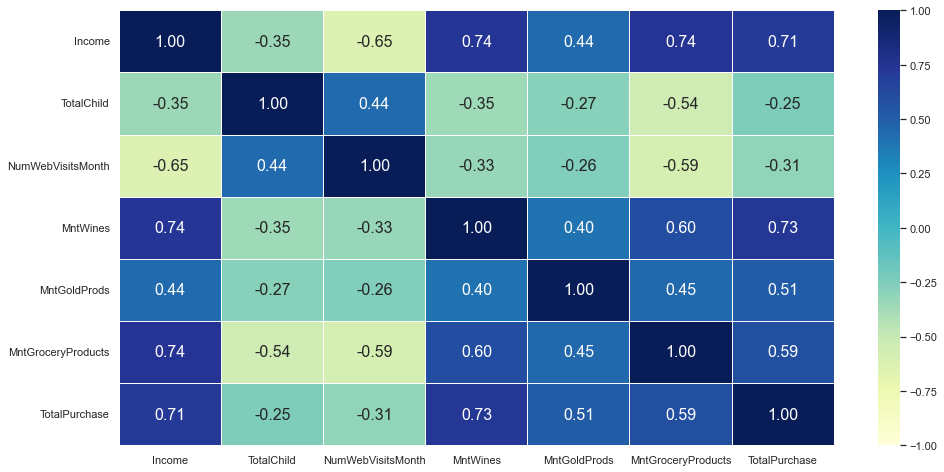

In [16]:
f = plt.figure(figsize=(16, 8))

sb.heatmap(newCustomerData[['Income','TotalChild','NumWebVisitsMonth',
                            'MntWines','MntGoldProds','MntGroceryProducts','TotalPurchase']].corr(), vmin = -1, vmax = 1, 
                            annot = True, annot_kws={"size": 16}, fmt=".2f", linewidths=.5, cmap="YlGnBu")

## Jointplot 

<Figure size 144x432 with 0 Axes>

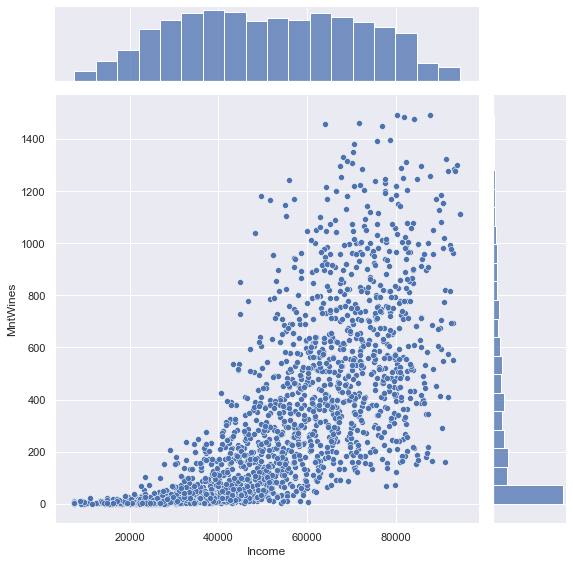

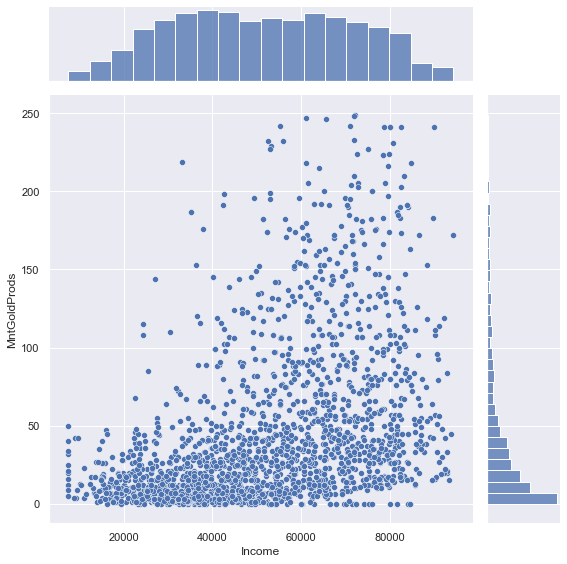

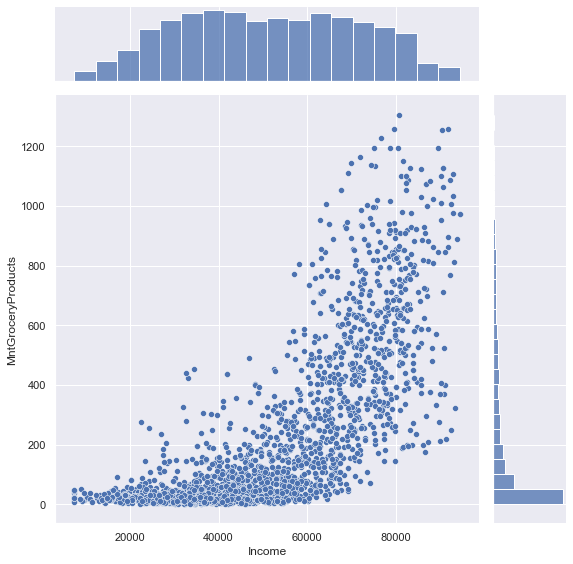

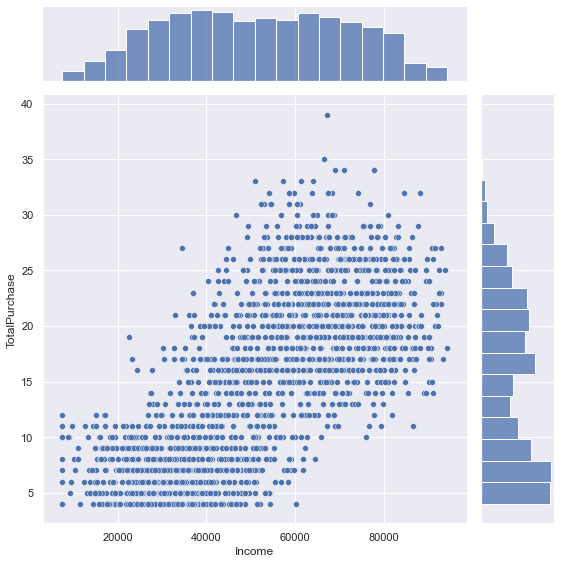

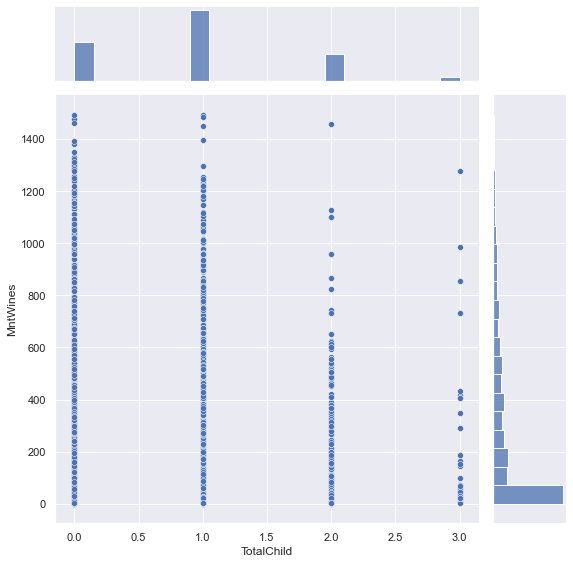

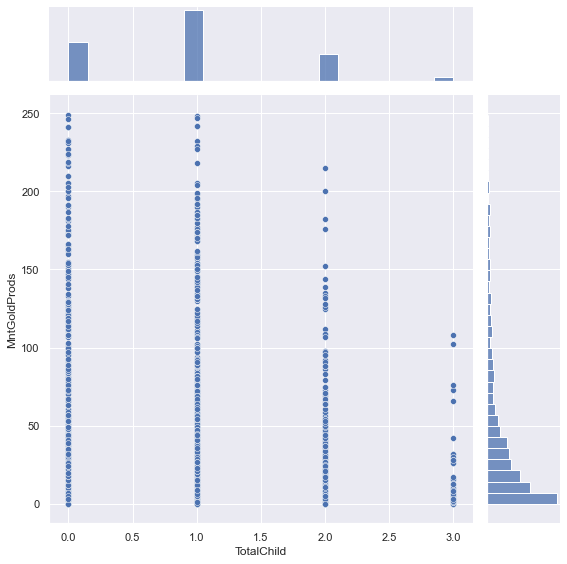

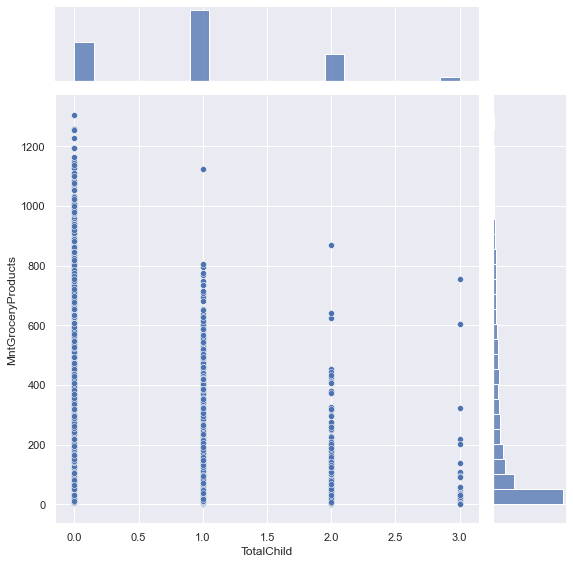

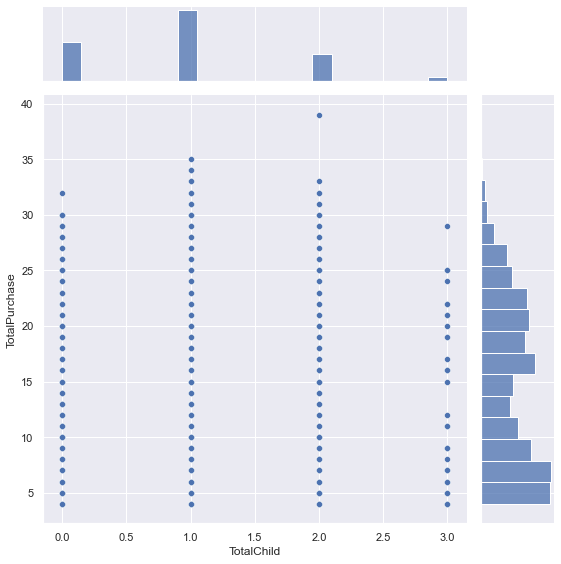

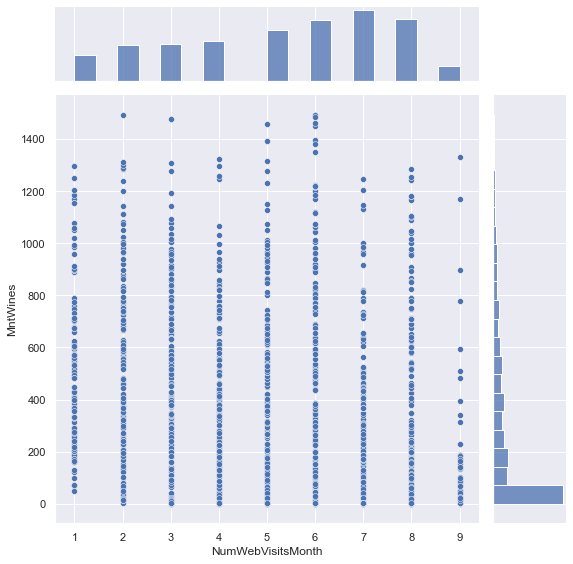

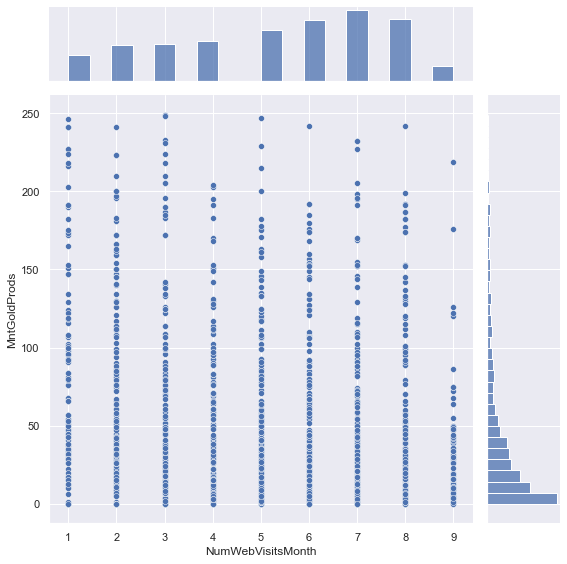

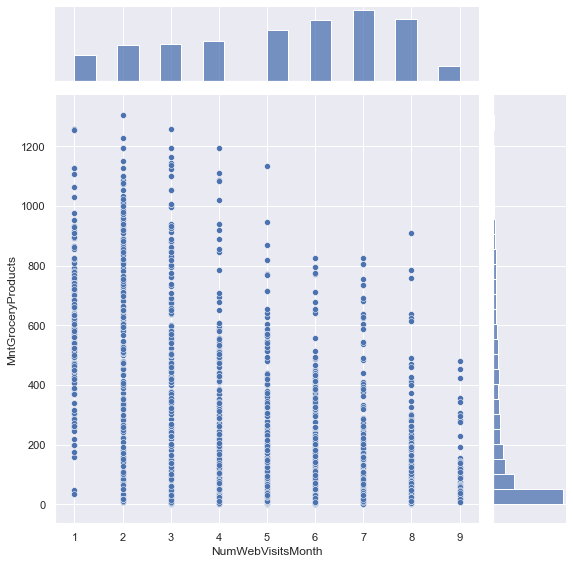

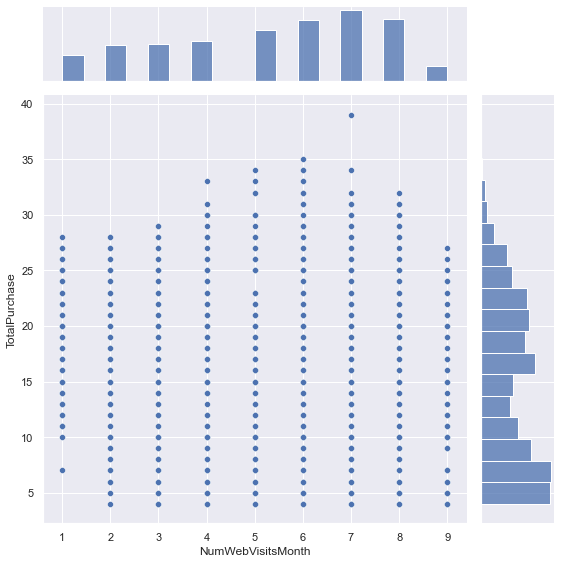

In [17]:
f = plt.figure(figsize=(2, 6))

# Predictor: Income
sb.jointplot(data = newCustomerData, x = "Income", y = "MntWines", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "MntGoldProds", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "TotalPurchase", height = 8)

# Predictor: TotalChild
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "MntWines", height = 8)
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "MntGoldProds", height = 8)
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "TotalPurchase", height = 8)

# Predictor: NumWebVisitsMonth (can be treated as categorical variable too)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "MntWines", height = 8)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "MntGoldProds", height = 8)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "TotalPurchase", height = 8)

# Formalizing Variable Types

The following variables in the dataset will be classified as categorical variables:
- YearRange
- Education
- Marital_Status
- HaveChild

In [18]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2166 non-null   int64  
 1   Year_Birth           2166 non-null   int64  
 2   Education            2166 non-null   object 
 3   Marital_Status       2166 non-null   object 
 4   Income               2166 non-null   float64
 5   Kidhome              2166 non-null   int64  
 6   Teenhome             2166 non-null   int64  
 7   Recency              2166 non-null   int64  
 8   MntWines             2166 non-null   int64  
 9   MntFruits            2166 non-null   int64  
 10  MntMeatProducts      2166 non-null   int64  
 11  MntFishProducts      2166 non-null   int64  
 12  MntSweetProducts     2166 non-null   int64  
 13  MntGoldProds         2166 non-null   int64  
 14  NumDealsPurchases    2166 non-null   int64  
 15  NumWebPurchases      2166 non-null   i

In [19]:
newCustomerData['YearRange'] = newCustomerData['YearRange'].astype("category")
newCustomerData['Education'] = newCustomerData['Education'].astype("category")
newCustomerData['Marital_Status'] = newCustomerData['Marital_Status'].astype("category")
newCustomerData['HaveChild'] = newCustomerData['HaveChild'].astype("category")

In [20]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           2166 non-null   int64   
 1   Year_Birth           2166 non-null   int64   
 2   Education            2166 non-null   category
 3   Marital_Status       2166 non-null   category
 4   Income               2166 non-null   float64 
 5   Kidhome              2166 non-null   int64   
 6   Teenhome             2166 non-null   int64   
 7   Recency              2166 non-null   int64   
 8   MntWines             2166 non-null   int64   
 9   MntFruits            2166 non-null   int64   
 10  MntMeatProducts      2166 non-null   int64   
 11  MntFishProducts      2166 non-null   int64   
 12  MntSweetProducts     2166 non-null   int64   
 13  MntGoldProds         2166 non-null   int64   
 14  NumDealsPurchases    2166 non-null   int64   
 15  NumWebPurchases      

# Machine Learning - Linear Regression (Multi-Variate)

In this section, we will be using Grid-Search Cross Validation for our Linear Regression model.

## Grid-Search Cross Validation

<p style='text-align: justify;'> Here we will perform Grid-Search Cross Validation (GSCV) using K-Fold Splitting on X_train_lr.csv and Y_train_lr.csv datasets, which were splitted using train_test_split from the original sorted_customerData.csv dataset (a sorted version of customerData.csv dataset based on alphabetical order, for easier extraction of predictor variables). This allows us to choose the best combination of parameters. More details on the train_test_split method can be found in Data-splitting.ipynb. 
</p>

<div style="text-align: left;font-size: 20px;">
<p style = "float: left;"><a href="Data-splitting.ipynb">&lt;- Data-splitting</a></span>
</div>

### Response Variable: TotalPurchase

In this section, we will be focussing on the following scoring metrics: __Explained Variance (R²)__ and __Mean Squared Error (MSE)__.

We will begin with __TotalPurchase__.

### a) Explained Variance 

In [39]:
# Importing relevant libraries
import sklearn
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Defining datasets
X_train = pd.read_csv('dataset/Linear_Regression/X_train_lr.csv')
Y_train = pd.read_csv('dataset/Linear_Regression/Y_train_lr.csv')
Y_train = pd.DataFrame(Y_train['TotalPurchase'])
X_test = pd.read_csv('dataset/Linear_Regression/X_test_lr.csv')
Y_test = pd.read_csv('dataset/Linear_Regression/Y_test_lr.csv')
Y_test = pd.DataFrame(Y_test['TotalPurchase'])

# Step-1: Create a Cross-Validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# Step-2: Specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 17))}]

# Step-3: Perform Grid-Search CV
# 3.1 Specify model
lm = LinearRegression()
lm.fit(X_train, Y_train)

# 3.2 Apply Recursive Feature Elimination (RFE) on Linear Regression
rfe = RFE(lm)             

# 3.3 Call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'explained_variance', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# Step-4: Fit the model
model_cv.fit(X_train, Y_train)    

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15,
                                                   16]}],
             return_train_score=True, scoring='explained_variance', verbose=1)

In [40]:
# For reference
train_data = pd.concat([X_train, Y_train], axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1732 non-null   int64  
 1   Income             1732 non-null   float64
 2   NumWebVisitsMonth  1732 non-null   int64  
 3   TotalChild         1732 non-null   int64  
 4   Basic              1732 non-null   int64  
 5   Graduation         1732 non-null   int64  
 6   Master             1732 non-null   int64  
 7   PhD                1732 non-null   int64  
 8   Married            1732 non-null   int64  
 9   Single             1732 non-null   int64  
 10  1                  1732 non-null   int64  
 11  1950               1732 non-null   int64  
 12  1960               1732 non-null   int64  
 13  1970               1732 non-null   int64  
 14  1980               1732 non-null   int64  
 15  1990               1732 non-null   int64  
 16  TotalPurchase      1732 

#### Results of GridSearch CV

In [41]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010272,0.000943,0.002063,0.000241,1,{'n_features_to_select': 1},0.040743,0.055259,0.028851,0.009983,...,0.028926,0.030739,0.027884,0.028106,0.030305,0.029887,0.029759,0.029130,0.028786,0.001458
1,0.008835,0.001377,0.001863,0.000308,2,{'n_features_to_select': 2},0.036520,0.096514,0.052513,0.034485,...,0.045300,0.047137,0.046596,0.045667,0.044077,0.044582,0.051033,0.049392,0.046046,0.002916
2,0.008725,0.000858,0.001693,0.000454,3,{'n_features_to_select': 3},0.033567,0.207755,0.111754,0.150163,...,0.127141,0.123041,0.128532,0.125337,0.128509,0.117487,0.132355,0.135546,0.118093,0.024339
3,0.008406,0.001087,0.001500,0.000500,4,{'n_features_to_select': 4},0.124074,0.214271,0.118574,0.156492,...,0.129193,0.125303,0.130759,0.128878,0.130607,0.119361,0.135620,0.139363,0.128520,0.006190
4,0.008052,0.001002,0.001713,0.000467,5,{'n_features_to_select': 5},0.145355,0.239341,0.133148,0.181995,...,0.144559,0.140176,0.147227,0.146863,0.147476,0.132106,0.153878,0.156236,0.144455,0.007491
5,0.007312,0.001425,0.001908,0.000540,6,{'n_features_to_select': 6},0.142553,0.237733,0.130806,0.178820,...,0.144709,0.141396,0.147277,0.147200,0.149313,0.132274,0.154572,0.157520,0.145194,0.007750
6,0.006660,0.000446,0.001806,0.000407,7,{'n_features_to_select': 7},0.139572,0.249418,0.195176,0.178527,...,0.171406,0.141432,0.176076,0.147294,0.149553,0.168024,0.155621,0.157740,0.157790,0.011384
7,0.006636,0.000626,0.001753,0.000599,8,{'n_features_to_select': 8},0.138174,0.246367,0.195814,0.218003,...,0.172574,0.171060,0.177000,0.149101,0.151035,0.169030,0.157094,0.160784,0.162171,0.010172
8,0.005946,0.000700,0.001736,0.000487,9,{'n_features_to_select': 9},0.138068,0.246081,0.194170,0.219481,...,0.173635,0.172062,0.177823,0.149127,0.153089,0.169552,0.158410,0.161062,0.162979,0.010291
9,0.005792,0.000669,0.001701,0.000458,10,{'n_features_to_select': 10},0.167185,0.243372,0.189607,0.215672,...,0.174004,0.172760,0.178058,0.175524,0.153094,0.169890,0.158423,0.189670,0.171723,0.009731


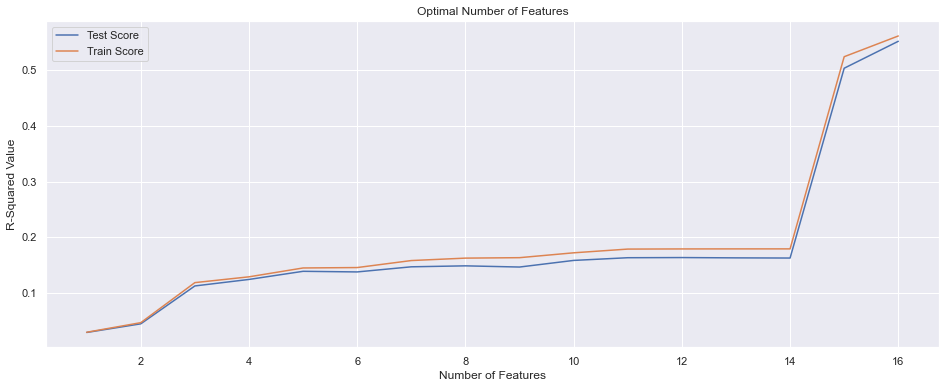

In [42]:
# Plotting CV results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('Number of Features')
plt.ylabel('R-Squared Value')
plt.title("Optimal Number of Features")
plt.legend(['Test Score', 'Train Score'], loc='upper left')

From the above plot, we deduced that the optimal number of features is __15__.

In [43]:
# Final Model
# Try with another value of RFE
n_features_optimal = 15

lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

# Predict prices of X_test (with and without GSCV)
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, y_pred)
print("Normal linreg\t\t\t:",r2)

y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, y_pred)
print("Improved correlation with CV\t:",r2)

Normal linreg			: 0.5948363037088474
Improved correlation with CV	: 0.5962504570463445


### b) Mean Squared Error

In [44]:
# We will use the same hyperparamters as initialized in Steps 1 to 3.2 in "Explained Variance" section.
# 3.3 Call GridSearchCV()
model_cv1 = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# Step-4: Fit the model
model_cv1.fit(X_train, Y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression(),
                           n_features_to_select=15),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15,
                                                   16]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

#### Results of GridSearch CV 

In [45]:
cv_results = pd.DataFrame(model_cv1.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009413,0.001662,0.001690,0.000588,1,{'n_features_to_select': 1},-57.636392,-58.270213,-55.844392,-53.929190,...,-55.178634,-55.363686,-55.484533,-55.617983,-55.275334,-54.969802,-55.344663,-55.085541,-55.215901,0.230873
1,0.009688,0.001667,0.001792,0.000490,2,{'n_features_to_select': 2},-57.798780,-55.764574,-54.452554,-52.601215,...,-54.248244,-54.427024,-54.416540,-54.613045,-54.490296,-54.137136,-54.131154,-53.935874,-54.234469,0.235316
2,0.008047,0.000550,0.001510,0.000492,3,{'n_features_to_select': 3},-57.985049,-49.144075,-50.955589,-46.301839,...,-49.597864,-50.091464,-49.739953,-50.053826,-49.677433,-50.006075,-49.492370,-49.047664,-50.135370,1.270178
3,0.007740,0.000773,0.001555,0.000471,4,{'n_features_to_select': 4},-52.329663,-48.738562,-50.508401,-45.963279,...,-49.481215,-49.962245,-49.612815,-49.851158,-49.557853,-49.899917,-49.306118,-48.831105,-49.545207,0.326453
4,0.007993,0.000816,0.001506,0.000507,5,{'n_features_to_select': 5},-51.049052,-47.119490,-49.287113,-44.572415,...,-48.608117,-49.112724,-48.672874,-48.821956,-48.596250,-49.177713,-48.264652,-47.873715,-48.638995,0.371378
5,0.007470,0.000663,0.001700,0.000458,6,{'n_features_to_select': 6},-51.217011,-47.227410,-49.410619,-44.743313,...,-48.599610,-49.043030,-48.670031,-48.802661,-48.491504,-49.168231,-48.225059,-47.800889,-48.597001,0.386800
6,0.007692,0.000991,0.001805,0.000396,7,{'n_features_to_select': 7},-51.394272,-46.422851,-45.698581,-44.759332,...,-47.082609,-49.040963,-47.026320,-48.797281,-48.477830,-47.142521,-48.165226,-47.788389,-47.882677,0.741597
7,0.006934,0.000523,0.001696,0.000456,8,{'n_features_to_select': 8},-51.475847,-46.626932,-45.723439,-42.599040,...,-47.016244,-47.348640,-46.973580,-48.693861,-48.393352,-47.085481,-48.081211,-47.615720,-47.632908,0.628124
8,0.006558,0.000738,0.001661,0.000453,9,{'n_features_to_select': 9},-51.482170,-46.629989,-45.767453,-42.518375,...,-46.955941,-47.291393,-46.926589,-48.692402,-48.276278,-47.055904,-48.006151,-47.599939,-47.586925,0.631746
9,0.005826,0.000582,0.001454,0.000471,10,{'n_features_to_select': 10},-49.744062,-46.801001,-46.008844,-42.725680,...,-46.934955,-47.251532,-46.913197,-47.181774,-48.275978,-47.036766,-48.005373,-45.976736,-47.090173,0.631835


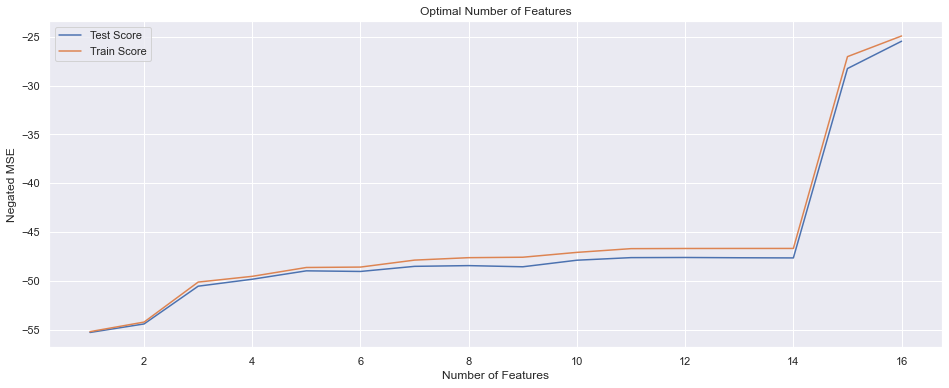

In [46]:
# Plotting CV results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('Number of Features')
plt.ylabel('Negated MSE')
plt.title("Optimal Number of Features")
plt.legend(['Test Score', 'Train Score'], loc='upper left')

In [47]:
# Final Model
# Try with another value of RFE
n_features_optimal = 15

lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

# Predict prices of X_test (with and without GSCV)
y_pred = lm.predict(X_test)
mse = sklearn.metrics.mean_squared_error(Y_test, y_pred)
print("Normal linreg\t\t\t:",mse)

y_pred = rfe.predict(X_test)
mse = sklearn.metrics.mean_squared_error(Y_test, y_pred)
print("Improved correlation with CV\t:",mse)

Normal linreg			: 23.899755831906155
Improved correlation with CV	: 23.81633789544137


### Other Response Variables

The above procedure is applied for the other 3 response variables - __MntGroceryProducts__, __MntGoldProds__ and __MntWines__.

__TotalPurchase__ is included here as well, for ease of reference and comparison between all response variables.

Response: TotalPurchase
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Normal linreg (MSE)		: 23.899755831906155
After GSCV (MSE)		: 23.81633789544137
Normal linreg (r2)		: 0.5948363037088474
After GSCV (r2)			: 0.5962504570463445
____________________________________________________________________________________________________
Response: MntGroceryProducts
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Normal linreg (MSE)		: 26706.38934343913
After GSCV (MSE)		: 26741.157946731433
Normal linreg (r2)		: 0.6590509193568193
After GSCV (r2)			: 0.6586070434297775
____________________________________________________________________________________________________
Response: MntWines
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Normal linreg (MSE)		: 41868

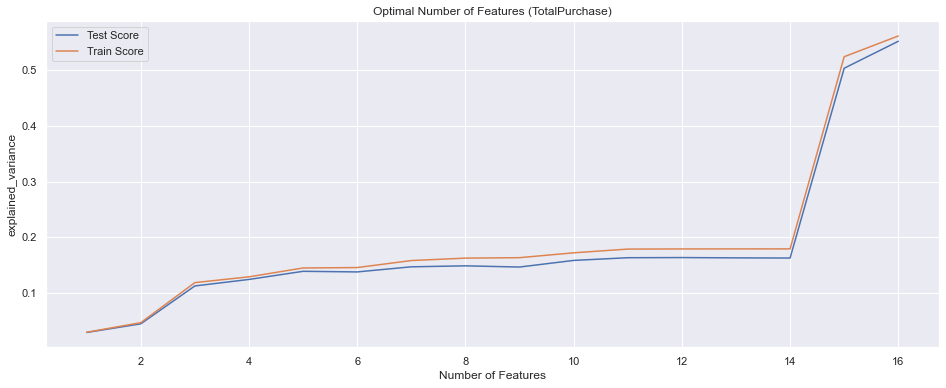

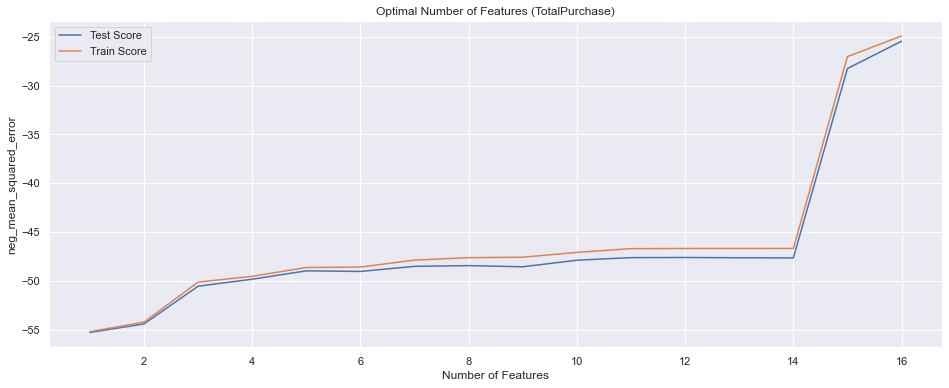

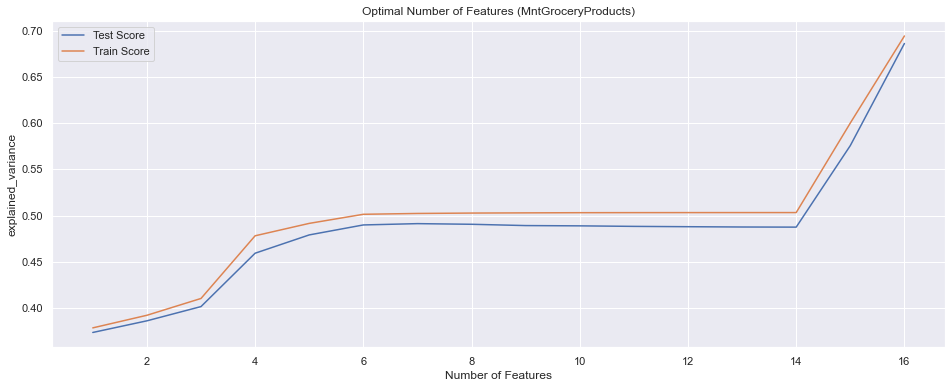

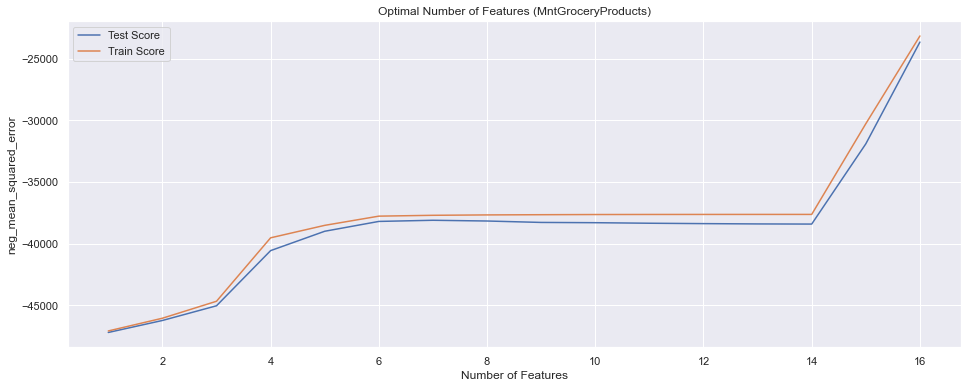

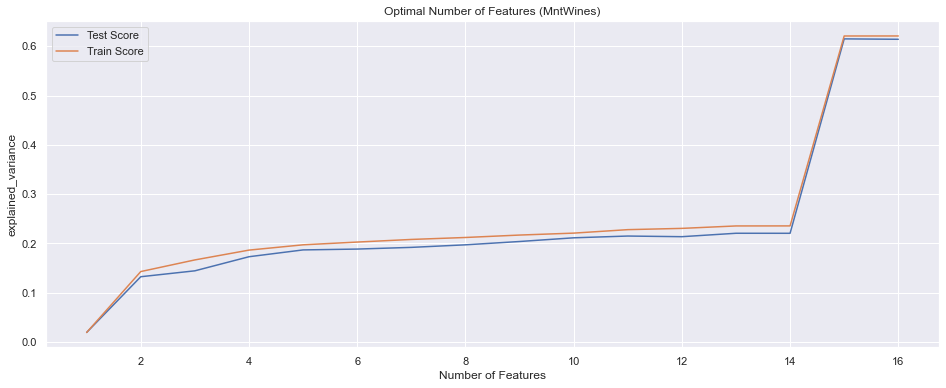

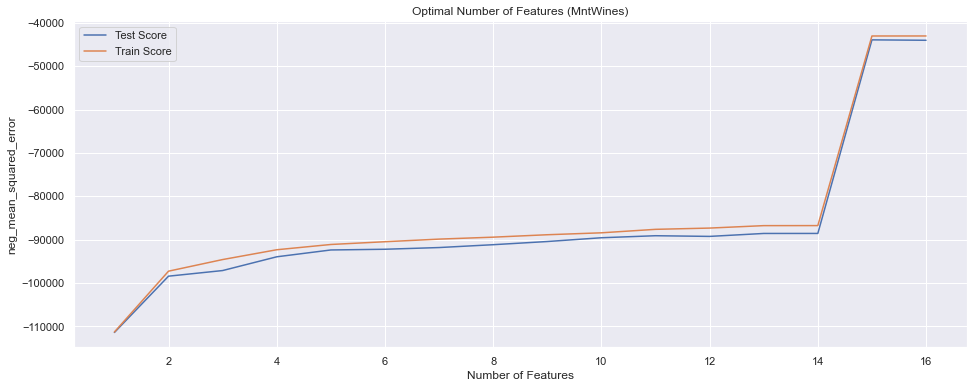

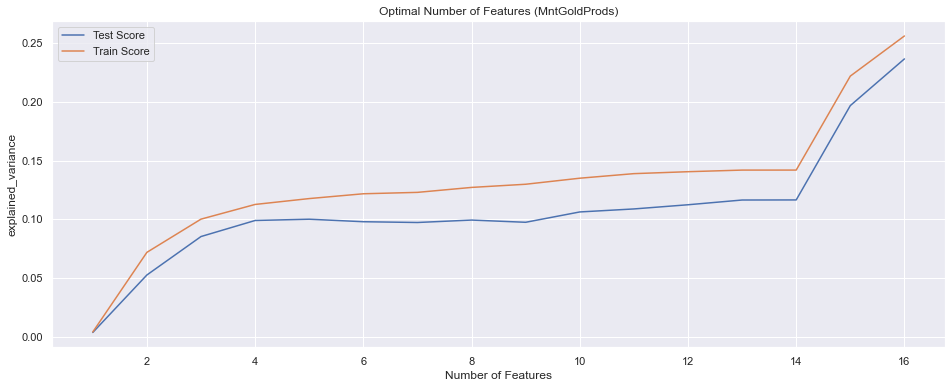

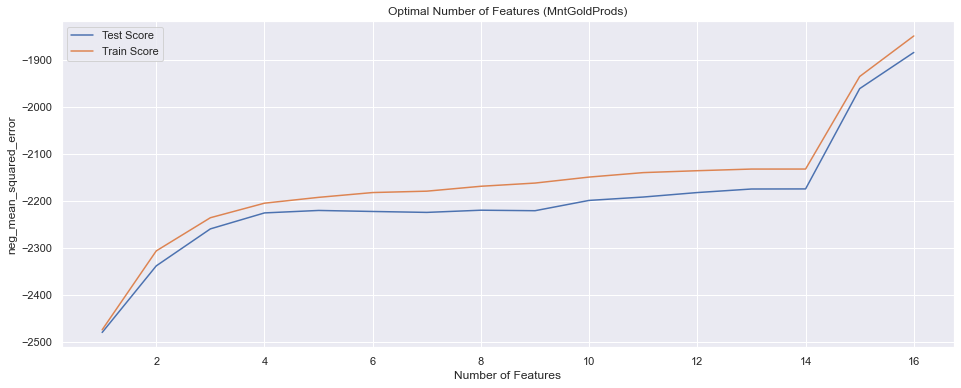

In [48]:
def GS(X_train, Y_train, num_split, scoring_metric):
    # Step-1: Create a Cross-Validation scheme
    folds = KFold(n_splits = num_split, shuffle = True, random_state = 100)

    # Step-2: Specify range of hyperparameters to tune
    hyper_params = [{'n_features_to_select': list(range(1, 17))}]


    # Step-3: Perform Grid-Search CV
    # 3.1 Specify model
    lm = LinearRegression()
    lm.fit(X_train, Y_train)
    
    # 3.2 Apply Recursive Feature Elimination (RFE) on Linear Regression
    rfe = RFE(lm)             

    # 3.3 Call GridSearchCV()
    model_cv = GridSearchCV(estimator = rfe, 
                            param_grid = hyper_params, 
                            scoring= scoring_metric, 
                            cv = folds, 
                            verbose = 1,
                            return_train_score=True)      

    # Step-4: Fit the model
    model_cv.fit(X_train, Y_train)
    
    return pd.DataFrame(model_cv.cv_results_)

def show_cv_results(cv_results, scoring_metric, response):
    plt.figure(figsize=(16,6))
    plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
    plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
    plt.xlabel('Number of Features')
    plt.ylabel(scoring_metric)
    plt.title("Optimal Number of Features ({})".format(response))
    plt.legend(['Test Score', 'Train Score'], loc='upper left')

def compare_metrics(X_train, Y_train, X_test, Y_test, n_features_optimal, metric):
    lm = LinearRegression()
    lm.fit(X_train, Y_train)

    rfe = RFE(lm, n_features_to_select=n_features_optimal)             
    rfe = rfe.fit(X_train, Y_train)

    if (metric == 'MSE'):
        # Predict prices of X_test (with and without GSCV)
        y_pred = lm.predict(X_test)
        mse = sklearn.metrics.mean_squared_error(Y_test, y_pred)
        print("Normal linreg ({})\t\t:".format(metric),mse)

        y_pred = rfe.predict(X_test)
        mse = sklearn.metrics.mean_squared_error(Y_test, y_pred)
        print("After GSCV ({})\t\t:".format(metric),mse)
    
    elif (metric == 'r2'):
        # Predict prices of X_test (with and without GSCV)
        y_pred = lm.predict(X_test)
        r2 = sklearn.metrics.r2_score(Y_test, y_pred)
        print("Normal linreg ({})\t\t:".format(metric),r2)

        y_pred = rfe.predict(X_test)
        r2 = sklearn.metrics.r2_score(Y_test, y_pred)
        print("After GSCV ({})\t\t\t:".format(metric),r2)


responses = ['TotalPurchase', 'MntGroceryProducts', 'MntWines', 'MntGoldProds']
scoring_metrics = ['explained_variance', 'neg_mean_squared_error']

for response in responses:
    Y_train = pd.read_csv('dataset/Linear_Regression/Y_train_lr.csv')
    Y_test = pd.read_csv('dataset/Linear_Regression/Y_test_lr.csv')
    Y_train = pd.DataFrame(Y_train[response])
    Y_test = pd.DataFrame(Y_test[response])
    print("Response:", response)
    
    for score in scoring_metrics:
        cv_results = GS(X_train, Y_train, 10, score)
        show_cv_results(cv_results, score, response)
    
    n_features_optimal = 15
    compare_metrics(X_train, Y_train, X_test, Y_test, n_features_optimal, 'MSE')
    compare_metrics(X_train, Y_train, X_test, Y_test, n_features_optimal, 'r2')
    print("_"*100)

### Summary

From the GSCV results above, we observe that there is only a __marginal__ improvement in the values of R² and MSE after carrying out GSCV, as compared to if Linear Regression is performed without GSCV. Nevertheless, such findings are still useful and valuable in enhancing our understanding of the impact of GSCV on these values for every combination of response and predictor variables. 

# Conclusion

With that, we have came to the end of this notebook.

Refer to Poisson_Regression.ipynb for the other Machine Learning model that we have used and applied onto our dataset.

<div style="font-size: 20px;">
<span style = "float: left;"><a href="Data-splitting.ipynb">&lt;- Data-splitting</a></span>
<span style = "float: right;"><a href="Poisson_Regression.ipynb">Poisson Regression -></a></span>
</div>

# References

- [Source of Dataset (Kaggle)](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)
- [Matplot Subplots](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)
- [Linear Regression using Sklearn](https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c)
- [Cross-Validation with Linear Regression (Kaggle)](https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression/notebook)
- [Sklearn Kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
- [Article related to GridSearchCV](https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee)
- [Recursive Feature Elimination (RFE) for Feature Selection in Python](https://machinelearningmastery.com/rfe-feature-selection-in-python/)
- [Sklearn GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)